In [797]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [798]:
PRECISION = 7

In [799]:
k = 8   # Количество испытаний
p = 0.7 # Вероятность успеха в одном испытании
n = 140 # Объем выборки

# k = 3   # Количество испытаний
# p = 0.5 # Вероятность успеха в одном испытании
# n = 160 # Объем выборки

# k = 10  # Количество испытаний
# p = 0.4 # Вероятность успеха в одном испытании
# n = 120 # Объем выборки

In [800]:
probs = [] # Вероятности

for j in range(k + 1):
    pj = math.comb(k, j) * p**j * (1 - p)**(k - j) # формула Бернулли
    probs.append(pj)

probs

[6.561000000000007e-05,
 0.0012247200000000012,
 0.010001880000000008,
 0.04667544000000002,
 0.13613670000000003,
 0.25412184000000004,
 0.29647547999999996,
 0.19765031999999993,
 0.05764800999999997]

In [801]:
kumProbs = [sum(probs[:(i + 1)]) for i in range(k + 1)] # Кумулятивные вероятности
kumProbs

[6.561000000000007e-05,
 0.0012903300000000012,
 0.011292210000000009,
 0.05796765000000003,
 0.19410435000000006,
 0.4482261900000001,
 0.74470167,
 0.9423519899999999,
 0.9999999999999999]

In [802]:
Y = np.random.rand(n) # n случайных величин
Y

array([0.28859036, 0.22851698, 0.306324  , 0.53074331, 0.04542381,
       0.87131256, 0.63210622, 0.12404403, 0.7848789 , 0.79912389,
       0.64404589, 0.895013  , 0.32058931, 0.11853037, 0.45941479,
       0.33452033, 0.8237566 , 0.39363782, 0.3173287 , 0.06192065,
       0.77460116, 0.52289271, 0.78948001, 0.26335576, 0.36447256,
       0.63647646, 0.15878174, 0.62446735, 0.07392361, 0.63305505,
       0.49902922, 0.87616914, 0.32858239, 0.85360513, 0.86905386,
       0.48937229, 0.19756528, 0.62983395, 0.56793161, 0.03918074,
       0.29288308, 0.53001387, 0.17647255, 0.17386723, 0.19160153,
       0.57623544, 0.6612052 , 0.63538678, 0.70290983, 0.81816806,
       0.27450513, 0.94741874, 0.36931895, 0.67422847, 0.48440553,
       0.687471  , 0.08445773, 0.37123536, 0.77021053, 0.48659669,
       0.40723839, 0.07659112, 0.51068454, 0.43161744, 0.92483112,
       0.97814925, 0.30673968, 0.33198738, 0.59808618, 0.89246312,
       0.86716686, 0.60462288, 0.32940887, 0.49928114, 0.48215

In [803]:
# По вектору Y разыгрываем вектор X в соответствии с алгоритмом
def k_func(u, r):
    i: int = 0
    for j in range(len(u)):
        if r < u[j]:
            break
        i += 1
    return i

X = []

for Yj in Y:
    X.append(k_func(kumProbs, Yj))

print(X)

[5, 5, 5, 6, 3, 7, 6, 4, 7, 7, 6, 7, 5, 4, 6, 5, 7, 5, 5, 4, 7, 6, 7, 5, 5, 6, 4, 6, 4, 6, 6, 7, 5, 7, 7, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 6, 6, 6, 6, 7, 5, 8, 5, 6, 6, 6, 4, 5, 7, 6, 5, 4, 6, 5, 7, 8, 5, 5, 6, 7, 7, 6, 5, 6, 6, 6, 4, 8, 7, 5, 3, 8, 2, 6, 7, 6, 6, 6, 5, 5, 6, 7, 3, 5, 7, 7, 6, 7, 5, 7, 5, 7, 4, 3, 4, 4, 7, 6, 4, 5, 4, 5, 6, 4, 7, 7, 5, 6, 6, 4, 5, 4, 6, 4, 5, 5, 4, 6, 4, 7, 7, 5, 7, 4, 7, 5, 6, 4, 8, 4]


In [804]:
# Строим статистический ряд
def findFreq(data, k):
    # values = set(data)
    values = np.arange(k + 1)
    counting = {}
    for value in values:
        counting[value] = 0

    for el in data:
        counting[el] += 1
    
    return [counting[el] for el in values]

# values  = list(set(X))
values  = np.arange(k + 1)
freq    = findFreq(X, k)
relFreq = np.array(freq) / n
kumFreq = np.array([sum(relFreq[:(i + 1)]) for i in range(len(relFreq))])

print(f'Значения случайной величины: {values}')
print(f'Частоты:                     {freq}')
print(f'Относительные частоты:       {relFreq}')
print(f'Накопленные частоты:         {kumFreq}')

Значения случайной величины: [0 1 2 3 4 5 6 7 8]
Частоты:                     [0, 0, 1, 5, 25, 34, 40, 30, 5]
Относительные частоты:       [0.         0.         0.00714286 0.03571429 0.17857143 0.24285714
 0.28571429 0.21428571 0.03571429]
Накопленные частоты:         [0.         0.         0.00714286 0.04285714 0.22142857 0.46428571
 0.75       0.96428571 1.        ]


In [805]:
def CDF(z, values, kumFreq):
    if z <= values[0]:
        return 0
    
    if len(values) > 1:
        for i in range(1, len(values)):
            prev = values[i - 1]
            curr = values[i]

            if prev < z <= curr:
                return kumFreq[i - 1]

    if z > values[-1]:
        return 1

In [806]:
def buildCDF(data, 
             cdf, values, kumFreq, 
             theoretical_cdf_y_values):
    RED   = '#6F1D1B'

    # Define font sizes
    SIZE_DEFAULT = 14
    SIZE_LARGE   = 16
    SIZE_TICKS   = 10
    plt.rc("font", weight="normal")          # controls default font
    plt.rc("font", size=SIZE_DEFAULT)        # controls default text sizes
    plt.rc("axes", titlesize=SIZE_LARGE)     # fontsize of the axes title
    plt.rc("axes", labelsize=SIZE_DEFAULT)   # fontsize of the x and y labels
    plt.rc("xtick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels
    plt.rc("ytick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels

    _, ax = plt.subplots(
        figsize=(6, 5)
    )

    # Generate a range of x values
    x_values = np.linspace(-1, np.max(data) + np.min(data) + 1, 100)
    # x_values = np.arange(k + 1)

    # Evaluate the function for each x value (empirical)
    cdf_y_values = [cdf(x, values, kumFreq) for x in x_values]

    xticks = [i for i in range(-1, int(np.max(data) + np.min(data)) + 1 + 1)]
    yticks = np.arange(0, 1.2 + 0.1, 0.1)

    # Hide the all but the bottom spines (axis lines)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position("left")
    ax.xaxis.set_ticks_position("bottom")
    ax.spines["bottom"].set_bounds(min(xticks), max(xticks))

    # plot y = 1 line
    plt.plot(x_values, np.full_like(x_values, 1), label='y = 1', linestyle='--', color='black')

    # Plot cdf(x) (empirical)
    plt.step(x_values, cdf_y_values, label='empirical(x)', color=RED)

    # Plot the theoretical distribution function
    # theoretical_cdf_y_values = sp.stats.binom.cdf(np.arange(n + 1), n, p)
    # plt.plot(x_values, theoretical_cdf_y_values, label='theoretical(x)', color='black', linestyle='--')

    # plt.step(np.arange(k + 1), theoretical_cdf_y_values, label='theoretical(x)', color='black', linestyle='--')

    # plt.step(x_values, np.cumsum(sp.stats.binom.pmf(x_values, n, p)), label='theoretical(x)', color='black', linestyle='--')
    # plt.step(np.arange(n + 1), theoretical_cdf_y_values, label='theoretical(x)', color='black', linestyle='--')

    # plt.step(np.array([-2, -1, 0, 1, 2, 3]) + 1, [0] + [0] + theoretical_cdf_y_values, label='theoretical(x)', color='black', linestyle='--')
    # theoretical_cdf_y_values = [0] + [0] + theoretical_cdf_y_values
    x_values = np.arange(-1, k + 2)
    plt.step(x_values, theoretical_cdf_y_values, label='theoretical(x)', color='black', linestyle='dotted')

    # axis names
    plt.xlabel('z')
    plt.ylabel('F(z)')

    plt.xticks(xticks)
    plt.yticks(yticks)

    # Adjust the font size of the tick labels
    plt.tick_params(axis='both', which='major', labelsize=SIZE_TICKS)

    plt.grid(True)

    plt.show()

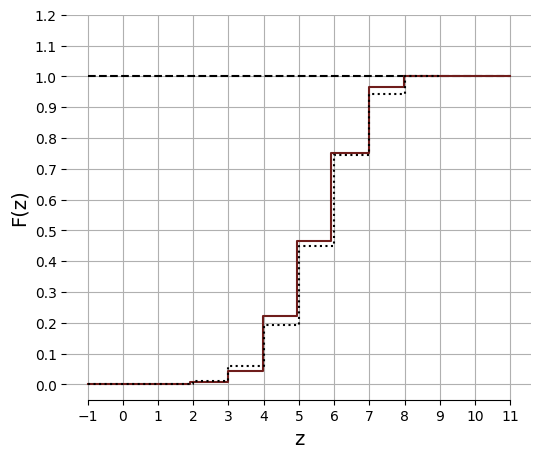

In [807]:
kumProbs = [0] + [0] + kumProbs
buildCDF(X, 
         CDF, values, kumFreq, # эмпирическая
         kumProbs)             # теоретическая


In [808]:
empirVals = []
theoretVals = []
diffs = []
print(f'значение: ', end='')
for i in range(0, k + 2):
    print(f'({i-1}, {i}]',end=', ')
    empirVal   = CDF(i, values, kumFreq)
    theoretVal = kumProbs[i + 1]
    diff = abs(empirVal - theoretVal)

    empirVals.append(empirVal)
    theoretVals.append(theoretVal)
    diffs.append(diff)

print(f'\nэмпир функция распр: {empirVals}')
print(f'теор функция распр:  {theoretVals}')
print(f'модуль разности:     {diffs}')

D = max(diffs)
print(f'\nD = {D}')

значение: (-1, 0], (0, 1], (1, 2], (2, 3], (3, 4], (4, 5], (5, 6], (6, 7], (7, 8], (8, 9], 
эмпир функция распр: [0, 0.0, 0.0, 0.007142857142857143, 0.04285714285714286, 0.22142857142857142, 0.4642857142857143, 0.75, 0.9642857142857143, 1]
теор функция распр:  [0, 6.561000000000007e-05, 0.0012903300000000012, 0.011292210000000009, 0.05796765000000003, 0.19410435000000006, 0.4482261900000001, 0.74470167, 0.9423519899999999, 0.9999999999999999]
модуль разности:     [0, 6.561000000000007e-05, 0.0012903300000000012, 0.0041493528571428665, 0.015110507142857173, 0.027324221428571355, 0.016059524285714222, 0.005298330000000018, 0.021933724285714384, 1.1102230246251565e-16]

D = 0.027324221428571355


In [809]:
# эмпирическая

# выборочное среднее
overlineX = np.round((1 / n) * np.sum(X), PRECISION)
m1 = np.mean(X)

# выборочная дисперсия
S2 = np.round(1 / (n - 1) * np.sum((X - overlineX)**2), PRECISION)

print(f'выборочное среднее: {overlineX} ({m1})')
print(f'выборочная дисперсия: {S2}')

# теоретическая

# мат ожидание
m = sum([i * probs[i] for i in range(k + 1)])

# дисперсия
d = sum([(i - m)**2 * probs[i] for i in range(k + 1)])

print(f'мат ожидание: {m}')
print(f'дисперсия: {d}')

выборочное среднее: 5.55 (5.55)
выборочная дисперсия: 1.5586331
мат ожидание: 5.6
дисперсия: 1.68
